# Maestría en Ciencia de Datos e Inteligencia Artificial
## Módulo: 09: Minería de Datos
### 2025

### *Msc Renzo Claure*
---

### Análisis estadístico de Variables

#### *Tendencia Central y Dispersión*

In [17]:
import numpy as np
import pandas as pd

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
base = pd.read_csv(url)
encabezados = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
base.columns = encabezados
base.replace('?', np.nan, inplace=True)

#Corrigiendo valores nulos y cambiando tipos de datos
cols = ['symboling',  'normalized-losses',  'wheel-base',
 'length',  'width', 'height', 'curb-weight', 'engine-size', 'bore',
 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
 'city-mpg', 'highway-mpg', 'price']

for i in cols:
    base[i] = pd.to_numeric(base[i], errors='coerce')
    base[i] = base[i].fillna(base[i].mean())

cols = base.select_dtypes(exclude=['number']).columns.tolist()
for i in cols:
    mode_value = base[i].mode()[0]
    base[i] = base[i].fillna(mode_value)
    base[i] = base[i].astype(type(mode_value))



In [4]:
#frecuencias absolutas
base['aspiration'].value_counts()

aspiration
std      167
turbo     37
Name: count, dtype: int64

In [5]:
#frecuencias relativas
base['aspiration'].value_counts(normalize=True)

aspiration
std      0.818627
turbo    0.181373
Name: proportion, dtype: float64

In [6]:
# Descripción general de los datos
base.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0000
mean,0.823529,122.000000,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.329050,3.25830,10.148137,104.222772,5125.990099,25.240196,30.769608,13205.6900
std,1.239035,31.758944,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.271331,0.31175,3.981000,39.613588,478.071104,6.551513,6.898337,7888.0996
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.07000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.0000
25%,0.000000,101.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.11000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.7500
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.29000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.0000
75%,2.000000,137.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.41000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.0000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.17000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.0000


In [7]:
base.describe(exclude=['number'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,204,204,204,204,204,204,204,204,204,204
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,184,167,116,96,120,201,148,158,93


In [8]:
base.describe(include=['number'])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0000
mean,0.823529,122.000000,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.329050,3.25830,10.148137,104.222772,5125.990099,25.240196,30.769608,13205.6900
std,1.239035,31.758944,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.271331,0.31175,3.981000,39.613588,478.071104,6.551513,6.898337,7888.0996
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.07000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.0000
25%,0.000000,101.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.11000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.7500
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.29000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.0000
75%,2.000000,137.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.41000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.0000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.17000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.0000


In [9]:
base['make'].count()

np.int64(204)

In [10]:
base['symboling'].mean()

np.float64(0.8235294117647058)

In [11]:
base['wheel-base'].median()

97.0

In [12]:
# cohef de variacion
descriptivos = base.describe(include=['number'])
cv = descriptivos.loc['std', :] / descriptivos.loc['mean', :]
cv = cv.to_frame().transpose()
cv.rename(index={0:'cv'}, inplace=True)
descriptivos = pd.concat([descriptivos, cv])
descriptivos

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,122.000000,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.329050,3.258300,10.148137,104.222772,5125.990099,25.240196,30.769608,13205.690000
std,1.239035,31.758944,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.271331,0.311750,3.981000,39.613588,478.071104,6.551513,6.898337,7888.099600
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.750000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.000000
75%,2.000000,137.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000
cv,1.504542,0.260319,0.060666,0.071016,0.032567,0.045115,0.204242,0.328977,0.081504,0.095679,0.392289,0.380086,0.093264,0.259567,0.224193,0.597326


In [16]:
#pip install --upgrade pip
!pip install ydata-profiling

##### *Perfilado completo*


In [17]:
### Data profiling con pandas profiling
from ydata_profiling import ProfileReport as pp

profile = pp(base, title="Reporte Exploratorio del Dataset Autos", explorative=True)
#profile.to_notebook_iframe()  # descomentar si se desea visualizar en jupyter notebook
profile.to_file("reporte_autos.html") # guardar en archivo html

ModuleNotFoundError: No module named 'ydata_profiling'

### Análisis de datos categóricos
### *Agrupamiento, Group by, análisis resumido de variables Categóricas y Continuas*

In [ ]:
base.dtypes

In [ ]:
base['horsepower'] = base['horsepower'].astype('float')

In [ ]:
base_1 = base[["body-style", "horsepower"]]

In [ ]:
base_1.shape

(204, 2)

In [ ]:
base_1.head()

,body-style,horsepower
0,convertible,111.0
1,hatchback,154.0
2,sedan,102.0
3,sedan,115.0
4,sedan,110.0


In [ ]:
base_1.groupby(['body-style']).mean()

,horsepower
body-style,
convertible,135.800000
hardtop,142.250000
hatchback,101.374611
sedan,103.104167
wagon,98.008911


In [ ]:
base_1.groupby(['body-style'], as_index=False).mean()

,body-style,horsepower
0,convertible,135.800000
1,hardtop,142.250000
2,hatchback,101.374611
3,sedan,103.104167
4,wagon,98.008911


In [ ]:
base_2 = base[['body-style', 'drive-wheels', "horsepower"]]

In [ ]:
base_2.groupby(['body-style', 'drive-wheels'], as_index=False).mean()

,body-style,drive-wheels,horsepower
0,convertible,fwd,90.000000
1,convertible,rwd,147.250000
2,hardtop,fwd,69.000000
3,hardtop,rwd,152.714286
4,hatchback,4wd,116.500000
5,hatchback,fwd,85.188220
6,hatchback,rwd,141.526316
7,sedan,4wd,102.666667
8,sedan,fwd,86.631579
9,sedan,rwd,129.222222


#### *Tablas Pivote-Dinamicas*

In [ ]:
agrupado1 = base_2.groupby(['body-style', 'drive-wheels'], as_index=False).mean()
agrupado1

,body-style,drive-wheels,horsepower
0,convertible,fwd,90.000000
1,convertible,rwd,147.250000
2,hardtop,fwd,69.000000
3,hardtop,rwd,152.714286
4,hatchback,4wd,116.500000
5,hatchback,fwd,85.188220
6,hatchback,rwd,141.526316
7,sedan,4wd,102.666667
8,sedan,fwd,86.631579
9,sedan,rwd,129.222222


In [ ]:
agrupado1.pivot(index='drive-wheels', columns= 'body-style')

horsepower                                                
body-style   convertible     hardtop   hatchback       sedan       wagon
drive-wheels                                                            
4wd                  NaN         NaN  116.500000  102.666667   79.250000
fwd                90.00   69.000000   85.188220   86.631579   90.185231
rwd               147.25  152.714286  141.526316  129.222222  116.777778

In [ ]:
pd.pivot_table(base, index=[ 'drive-wheels'], values=['horsepower'], columns=['body-style'], aggfunc=['mean', 'count'])

mean                                                  \
              horsepower                                                   
body-style   convertible     hardtop   hatchback       sedan       wagon   
drive-wheels                                                               
4wd                  NaN         NaN  116.500000  102.666667   79.250000   
fwd                90.00   69.000000   85.188220   86.631579   90.185231   
rwd               147.25  152.714286  141.526316  129.222222  116.777778   

                   count                                
              horsepower                                
body-style   convertible hardtop hatchback sedan wagon  
drive-wheels                                            
4wd                  NaN     NaN       2.0   3.0   4.0  
fwd                  1.0     1.0      49.0  57.0  12.0  
rwd                  4.0     7.0      19.0  36.0   9.0

In [ ]:
pd.pivot_table(base, index=[ 'drive-wheels', 'num-of-doors' ], values=['horsepower'], columns=['body-style'], aggfunc='mean')

horsepower                                      \
body-style                convertible     hardtop   hatchback       sedan   
drive-wheels num-of-doors                                                   
4wd          four                 NaN         NaN         NaN  102.666667   
             two                  NaN         NaN  116.500000         NaN   
fwd          four                 NaN         NaN   75.900000   88.978261   
             two                90.00   69.000000   87.569815   75.444444   
rwd          four                 NaN         NaN         NaN  126.800000   
             two               147.25  152.714286  141.526316  141.333333   

                                       
body-style                      wagon  
drive-wheels num-of-doors              
4wd          four           79.250000  
             two                  NaN  
fwd          four           90.185231  
             two                  NaN  
rwd          four          116.777778  
             two                  NaN

In [ ]:
pd.pivot_table(base, index=[ 'drive-wheels', 'num-of-doors' ], values=['horsepower'], columns=['body-style'], aggfunc=['sum', 'mean', 'count'])

sum                               \
                           horsepower                                
body-style                convertible hardtop    hatchback   sedan   
drive-wheels num-of-doors                                            
4wd          four                 NaN     NaN          NaN   308.0   
             two                  NaN     NaN   233.000000     NaN   
fwd          four                 NaN     NaN   759.000000  4093.0   
             two                 90.0    69.0  3415.222772   679.0   
rwd          four                 NaN     NaN          NaN  3804.0   
             two                589.0  1069.0  2689.000000   848.0   

                                              mean                          \
                                        horsepower                           
body-style                       wagon convertible     hardtop   hatchback   
drive-wheels num-of-doors                                                    
4wd          four           317.000000         NaN         NaN         NaN   
             two                   NaN         NaN         NaN  116.500000   
fwd          four          1082.222772         NaN         NaN   75.900000   
             two                   NaN       90.00   69.000000   87.569815   
rwd          four          1051.000000         NaN         NaN         NaN   
             two                   NaN      147.25  152.714286  141.526316   

                                                        count          \
                                                   horsepower           
body-style                      sedan       wagon convertible hardtop   
drive-wheels num-of-doors                                               
4wd          four          102.666667   79.250000         NaN     NaN   
             two                  NaN         NaN         NaN     NaN   
fwd          four           88.978261   90.185231         NaN     NaN   
             two            75.444444         NaN         1.0     1.0   
rwd          four          126.800000  116.777778         NaN     NaN   
             two           141.333333         NaN         4.0     7.0   

                                                 
                                                 
body-style                hatchback sedan wagon  
drive-wheels num-of-doors                        
4wd          four               NaN   3.0   4.0  
             two                2.0   NaN   NaN  
fwd          four              10.0  46.0  12.0  
             two               39.0   9.0   NaN  
rwd          four               NaN  30.0   9.0  
             two               19.0   6.0   NaN

In [ ]:
df2 = pd.pivot_table(base, index=[ 'drive-wheels', 'num-of-doors' ], values=['horsepower'], columns=['body-style'], aggfunc=['sum', 'mean', 'count'])

In [ ]:
df2.reset_index() #para convertir los índices en columnas

drive-wheels num-of-doors         sum                               \
                                      horsepower                                
body-style                           convertible hardtop    hatchback   sedan   
0                   4wd         four         NaN     NaN          NaN   308.0   
1                   4wd          two         NaN     NaN   233.000000     NaN   
2                   fwd         four         NaN     NaN   759.000000  4093.0   
3                   fwd          two        90.0    69.0  3415.222772   679.0   
4                   rwd         four         NaN     NaN          NaN  3804.0   
5                   rwd          two       589.0  1069.0  2689.000000   848.0   

                               mean                                      \
                         horsepower                                       
body-style        wagon convertible     hardtop   hatchback       sedan   
0            317.000000         NaN         NaN         NaN  102.666667   
1                   NaN         NaN         NaN  116.500000         NaN   
2           1082.222772         NaN         NaN   75.900000   88.978261   
3                   NaN       90.00   69.000000   87.569815   75.444444   
4           1051.000000         NaN         NaN         NaN  126.800000   
5                   NaN      147.25  152.714286  141.526316  141.333333   

                             count                                
                        horsepower                                
body-style       wagon convertible hardtop hatchback sedan wagon  
0            79.250000         NaN     NaN       NaN   3.0   4.0  
1                  NaN         NaN     NaN       2.0   NaN   NaN  
2            90.185231         NaN     NaN      10.0  46.0  12.0  
3                  NaN         1.0     1.0      39.0   9.0   NaN  
4           116.777778         NaN     NaN       NaN  30.0   9.0  
5                  NaN         4.0     7.0      19.0   6.0   NaN

In [ ]:
df2 = df2.reset_index()

In [ ]:
df2.sort_values('num-of-doors', ascending=False )

drive-wheels num-of-doors         sum                               \
                                      horsepower                                
body-style                           convertible hardtop    hatchback   sedan   
1                   4wd          two         NaN     NaN   233.000000     NaN   
3                   fwd          two        90.0    69.0  3415.222772   679.0   
5                   rwd          two       589.0  1069.0  2689.000000   848.0   
0                   4wd         four         NaN     NaN          NaN   308.0   
2                   fwd         four         NaN     NaN   759.000000  4093.0   
4                   rwd         four         NaN     NaN          NaN  3804.0   

                               mean                                      \
                         horsepower                                       
body-style        wagon convertible     hardtop   hatchback       sedan   
1                   NaN         NaN         NaN  116.500000         NaN   
3                   NaN       90.00   69.000000   87.569815   75.444444   
5                   NaN      147.25  152.714286  141.526316  141.333333   
0            317.000000         NaN         NaN         NaN  102.666667   
2           1082.222772         NaN         NaN   75.900000   88.978261   
4           1051.000000         NaN         NaN         NaN  126.800000   

                             count                                
                        horsepower                                
body-style       wagon convertible hardtop hatchback sedan wagon  
1                  NaN         NaN     NaN       2.0   NaN   NaN  
3                  NaN         1.0     1.0      39.0   9.0   NaN  
5                  NaN         4.0     7.0      19.0   6.0   NaN  
0            79.250000         NaN     NaN       NaN   3.0   4.0  
2            90.185231         NaN     NaN      10.0  46.0  12.0  
4           116.777778         NaN     NaN       NaN  30.0   9.0

#### Ejercicio en clase:
*Cree una tabla pivoteada con las variables engine-location y aspiration, resuma los datos con el promedio del precio*\
**¿Cual es el precio promedio de los autos con "turbo" y "motor adelante"?, ¿cuanto casos hay de ese tipo?**

In [ ]:
base.head(10)

#### *Análisis de correlación*

In [ ]:
from scipy import stats

In [ ]:
#La forma básica
base.corr(numeric_only=True)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,-0.140126,0.007706,-0.177413,0.070457,0.278984,-0.030557,0.039598,-0.083136
wheel-base,-0.525095,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,0.498630,0.148367,0.249199,0.355907,-0.365896,-0.479633,-0.552897,0.587607
length,-0.356792,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,0.609274,0.126928,0.157913,0.555076,-0.288046,-0.673251,-0.706635,0.683372
width,-0.227799,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,0.562720,0.177104,0.180287,0.644075,-0.221468,-0.647177,-0.681169,0.730130
height,-0.533078,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,0.183725,-0.077568,0.261036,-0.109549,-0.328303,-0.055659,-0.113995,0.136123
curb-weight,-0.229281,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,0.649526,0.170165,0.151372,0.751035,-0.266372,-0.758238,-0.798088,0.820831
engine-size,-0.107229,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,0.594361,0.208859,0.029083,0.810718,-0.244565,-0.654101,-0.677775,0.861753
bore,-0.140126,0.498630,0.609274,0.562720,0.183725,0.649526,0.594361,1.000000,-0.051692,0.005951,0.576601,-0.263879,-0.593916,-0.593982,0.532839
stroke,0.007706,0.148367,0.126928,0.177104,-0.077568,0.170165,0.208859,-0.051692,1.000000,0.185116,0.090714,-0.074271,-0.049543,-0.050180,0.083158
compression-ratio,-0.177413,0.249199,0.157913,0.180287,0.261036,0.151372,0.029083,0.005951,0.185116,1.000000,-0.205551,-0.436764,0.324186,0.264677,0.071058


In [ ]:
# con Pvalues
r_pearson, pvalue = stats.pearsonr(base['highway-mpg'], base['wheel-base'])
print('El coheficiente de corelacion entre rendimiento en carretera y distancia entre ejes es: {:.3f}\ncon un P-value de: {:} '.format(r_pearson, pvalue))

El coheficiente de corelacion entre rendimiento en carretera y distancia entre ejes es: -0.553
con un P-value de: 9.953323634119704e-18 


In [ ]:
float = 2.1543273344533
format_float = "{:.3f}".format(float)
print(format_float)

2.154


Realice el análisis para y determine la fuerza de la relación, el sentido y su significancia:
- Length vs. Price
- Width vs. Price
- Wheel-Base vs. Price
- Bore vs. Price
- Highway-mpg vs. Price
- City-mpg vs. Price

In [ ]:
# con Pvalues
r_pearson, pvalue = stats.pearsonr(base['highway-mpg'], base['price'])
print('El coheficiente de corelacion entre rendimiento en carretera y precio es: {:.3f}\ncon un P-value de: {:} '.format(r_pearson, pvalue))

El coheficiente de corelacion entre rendimiento en carretera y precio es: -0.691
con un P-value de: 2.7710550217445483e-30 


In [ ]:
# con Pvalues
r_pearson, pvalue = stats.pearsonr(base['width'], base['price'])
print('El coheficiente de corelacion entre bore y precio es: {:.3f}\ncon un P-value de: {:} '.format(r_pearson, pvalue))

El coheficiente de corelacion entre bore y precio es: 0.730
con un P-value de: 2.9928320375400486e-35 


#### *Comparación de Medias*

importamos el set de datos Flores:


In [21]:
from scipy import stats as st
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
nom_columna = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
flores = pd.read_csv(url, names=nom_columna)
flores.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
flores['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Comparación de una media

Se desea saber si la media muestral del "largo del sépalo" es distinta de 5.9

In [ ]:
flores['Sepal_Length'].mean()

5.843333333333334

In [ ]:
from scipy import stats as st
# t test con scipy
a =  flores['Sepal_Length'].to_numpy()
st.ttest_1samp(a=a, popmean=5.9)

TtestResult(statistic=-0.8381239979992521, pvalue=0.40330353059421875, df=149)

In [ ]:
flores['Sepal_Length'].mean()

5.843333333333334

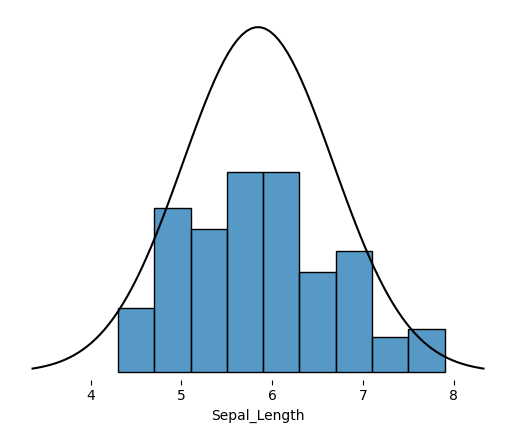

In [ ]:
media = flores['Sepal_Length'].mean()
desvstd = flores['Sepal_Length'].std()

x = np.linspace(media - 3*desvstd, media + 3*desvstd, 100)
y = 100* stats.norm.pdf(x, media, desvstd)

fig, ax = plt.subplots()
ax1 = sns.histplot(flores['Sepal_Length'])
ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)



In [ ]:
if st.ttest_1samp(a, popmean=5.9)[1] >=0.05:
    print('el P-value de:{:.3f} nos dice que la igualdad de medias es estadisticamente significantiva (P>0.05) \npor lo tanto la media es igual al valor propuesto'.format(st.ttest_1samp(a=a, popmean=5.9)[1]))
else:
    print('el P-value de:{:.3f} nos dice que la igualdad de medias no es estadisticamente significantiva (P<0.05) \npor lo tanto la media no es igual al valor propuesto'.format(st.ttest_1samp(a=a, popmean=5.9)[1]))

el P-value de:0.403 nos dice que la igualdad de medias es estadisticamente significantiva (P>0.05) 
por lo tanto la media es igual al valor propuesto


#### Comparación de dos medias independientes

In [ ]:
ma = flores.loc[flores['Class']=='Iris-setosa', 'Sepal_Length'].mean()
mb = flores.loc[flores['Class']=='Iris-versicolor', 'Sepal_Length'].mean()
print('Determinar si el prom. de la longitud del Sepalo para Setos:{:.3f} es distinto que para Versicolor:{:.3f}'.format(ma, mb))

Determinar si el prom. de la longitud del Sepalo para Setos:5.006 es distinto que para Versicolor:5.936


In [ ]:
a = flores.loc[flores['Class']=='Iris-setosa', 'Sepal_Length'].to_numpy()
b = flores.loc[flores['Class']=='Iris-versicolor', 'Sepal_Length'].to_numpy()
resultado = st.ttest_ind(a, b, equal_var=True)

In [ ]:
resultado[1]

8.985235037487079e-18

In [ ]:
if st.ttest_ind(a, b,  equal_var=True)[1]>=0.05:
    print('el P-value de: {:.3f} nos dice que la igualdad de medias es estadisticamente significantiva (P>0.05) \npor lo tanto la media es igual en ambos grupos'.format(resultado[1]))
else:
    print('el P-value de:{:.3f} nos dice que la igualdad de medias no es estadisticamente significantiva (P<0.05) \npor lo tanto la media no es igual en ambos grupos'.format(resultado[1]))

el P-value de:0.000 nos dice que la igualdad de medias no es estadisticamente significantiva (P<0.05) 
por lo tanto la media no es igual en ambos grupos


#### *Comparacion de medias relacionadas*

In [18]:
dieta = pd.read_excel('files/dietas.xlsx', sheet_name='dietas')

In [19]:
dieta.head()

,id,gender,age,height,diet.type,"initial,weight","final,weight"
0,1,Female,22,159,A,58,54.2
1,2,Female,46,192,A,60,54.0
2,3,Female,55,170,A,64,63.3
3,4,Female,33,171,A,64,61.1
4,5,Female,50,170,A,65,62.2


In [ ]:
dieta['gender'].value_counts()

gender
Female    43
Male      33
Name: count, dtype: int64

In [ ]:
dieta['diet.type'].value_counts()

diet.type
C    27
B    25
A    24
Name: count, dtype: int64

In [ ]:
dieta[dieta['id']==1]

,id,gender,age,height,diet.type,"initial,weight","final,weight"
0,1,Female,22,159,A,58,54.2


In [ ]:
print( dieta[dieta['diet.type']=='A']['initial,weight'].mean())
print( dieta[dieta['diet.type']=='A']['final,weight'].mean())

72.875
69.575


In [ ]:
a = dieta[dieta['diet.type']=='A']['initial,weight'].to_numpy()
b = dieta[dieta['diet.type']=='A']['final,weight'].to_numpy()

In [ ]:
resultado = st.ttest_rel(a=a, b=b) 
resultado

TtestResult(statistic=7.216771317674052, pvalue=2.3967339414297313e-07, df=23)

In [ ]:
dieta_2 = dieta[dieta['diet.type'] == 'A']

a = dieta_2['initial,weight'].to_numpy()
b = dieta_2['final,weight'].to_numpy()

if st.ttest_rel(a, b)[1] >=0.05:
    print('el P-value de:{:} nos dice que la igualdad de medias es estadisticamente significantiva (P<0.05) \npor lo tanto la media es igual en ambos grupos'.format(resultado[1]))
else:
    print('el P-value de:{:.3f} nos dice que la igualdad de medias no es estadisticamente significantiva (P<0.05) \npor lo tanto la media no es igual en ambos grupos'.format(resultado[1]))

el P-value de:0.000 nos dice que la igualdad de medias no es estadisticamente significantiva (P<0.05) 
por lo tanto la media no es igual en ambos grupos


##### Ejercicio en clase
Compruebe para el tipo de Dieta C, si las diferencias son significativas antes y después del tratamiento, imprima las medias de los pesos antes y despues del tratamiento

#### *Análisis ANOVA*

In [22]:
flores_1 = flores[['Class', 'Sepal_Length']]

In [ ]:
flores_1.head(3)

,Class,Sepal_Length
0,Iris-setosa,5.1
1,Iris-setosa,4.9
2,Iris-setosa,4.7


In [23]:
flores_g = flores.groupby(['Class'])
flores_g.head(2)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
type(flores_g)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
flores_g

In [24]:
flores_g.get_group('Iris-setosa')['Sepal_Length'].head(5)

/tmp/ipykernel_33/1698877522.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  flores_g.get_group('Iris-setosa')['Sepal_Length'].head(5)


0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: Sepal_Length, dtype: float64

In [25]:
from scipy.stats import f_oneway

In [26]:
from scipy import stats as st

In [27]:
st.f_oneway(flores_g.get_group('Iris-setosa')['Sepal_Length'], flores_g.get_group('Iris-versicolor')['Sepal_Length'], flores_g.get_group('Iris-virginica')['Sepal_Length'])  

/tmp/ipykernel_33/2985480438.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  st.f_oneway(flores_g.get_group('Iris-setosa')['Sepal_Length'], flores_g.get_group('Iris-versicolor')['Sepal_Length'], flores_g.get_group('Iris-virginica')['Sepal_Length'])


F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [28]:
resultado = st.f_oneway(flores_g.get_group('Iris-setosa')['Sepal_Length'], flores_g.get_group('Iris-versicolor')['Sepal_Length'], flores_g.get_group('Iris-virginica')['Sepal_Length'])  
a, b = resultado
print( "ANOVA results: F=", a, ", P =", b)   

ANOVA results: F= 119.26450218450468 , P = 1.6696691907693826e-31


/tmp/ipykernel_33/323166607.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  resultado = st.f_oneway(flores_g.get_group('Iris-setosa')['Sepal_Length'], flores_g.get_group('Iris-versicolor')['Sepal_Length'], flores_g.get_group('Iris-virginica')['Sepal_Length'])


Por lo tanto la diferencvia de medias es estadísticamente significativa, se deduce que existe correlación entre la Variable Class y Sepal_Length. Tenemos que probar también entre qué grupos existen las mayores diferencias, esto se hace en forma pareada.

In [ ]:
resultado = st.f_oneway(flores_g.get_group('Iris-setosa')['Sepal_Length'], flores_g.get_group('Iris-versicolor')['Sepal_Length'])  
a, b = resultado
print( "ANOVA results: F=", a, ", P =", b)   

ANOVA results: F= 110.69115204195691 , P = 8.985235037487275e-18


C:\Users\rclaure\AppData\Local\Temp\ipykernel_28688\36621140.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  resultado = st.f_oneway(flores_g.get_group('Iris-setosa')['Sepal_Length'], flores_g.get_group('Iris-versicolor')['Sepal_Length'])


In [ ]:
resultado = st.f_oneway(flores_g.get_group('Iris-versicolor')['Sepal_Length'], flores_g.get_group('Iris-virginica')['Sepal_Length'])  
a, b = resultado
print( "ANOVA results: F=", a, ", P =", b)   

ANOVA results: F= 31.687501521236467 , P = 1.7248563024546671e-07


C:\Users\rclaure\AppData\Local\Temp\ipykernel_28688\1225225398.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  resultado = st.f_oneway(flores_g.get_group('Iris-versicolor')['Sepal_Length'], flores_g.get_group('Iris-virginica')['Sepal_Length'])


In [ ]:
resultado = st.f_oneway(flores_g.get_group('Iris-setosa')['Sepal_Length'], flores_g.get_group('Iris-virginica')['Sepal_Length'])  
a, b = resultado
print( "ANOVA results: F=", a, ", P =", b)   

ANOVA results: F= 236.7350218138295 , P = 6.892546060673534e-28


C:\Users\rclaure\AppData\Local\Temp\ipykernel_28688\1420824742.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  resultado = st.f_oneway(flores_g.get_group('Iris-setosa')['Sepal_Length'], flores_g.get_group('Iris-virginica')['Sepal_Length'])


Entonces confirmamos que existen diferencias significativas en el largo del sépalo para los tipos de flores, lo que nos puede ayudar  a crear un modelo de clasificación de flores

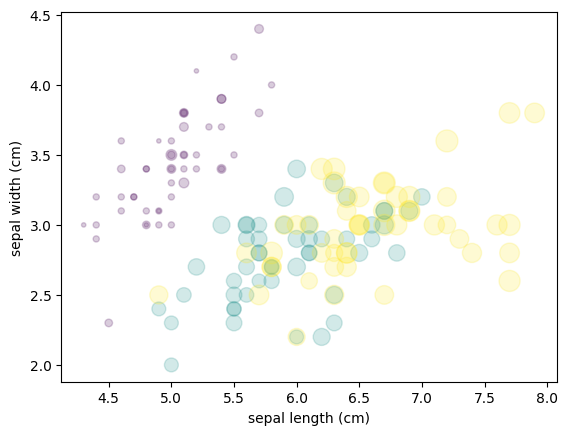

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

 **Realice un análisis ANOVA, en la base de datos Autos y determine si existen diferencias significativas entre los grupos de la variable "drive-wheels", "number of doors" y el Precio** \

<Axes: xlabel='drive-wheels', ylabel='price'>

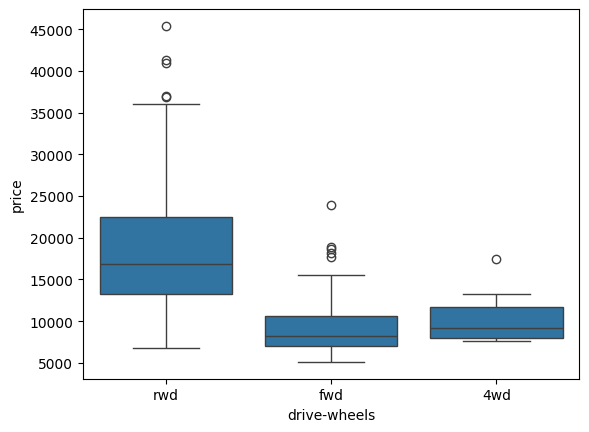

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=base)

<Axes: xlabel='num-of-doors', ylabel='price'>

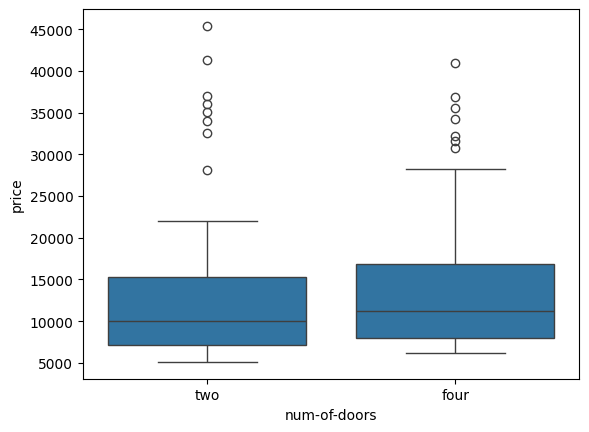

In [ ]:
sns.boxplot(x="num-of-doors", y="price", data=base)

In [ ]:
#!pip install statsmodels

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
base.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [31]:
base_2 = base[['price', 'drive-wheels', 'num-of-doors']]
base_2 = base_2.rename(columns={"drive-wheels": "dw", "num-of-doors": "nd"})
base_2.dtypes


price    float64
dw        object
nd        object
dtype: object

In [32]:
from statsmodels.stats.anova import anova_lm
formula = 'price ~ C(dw) + C(nd) + C(dw):C(nd)'

model = ols(formula, base_2).fit()
aov_table = anova_lm(model, typ=2)

In [33]:
aov_table

,sum_sq,df,F,PR(>F)
C(dw),5.173358e+09,2.0,68.926448,1.910263e-23
C(nd),9.723068e+07,1.0,2.590877,1.090740e-01
C(dw):C(nd),4.579648e+06,2.0,0.061016,9.408256e-01
Residual,7.430564e+09,198.0,NaN,NaN


In [ ]:
base.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
base[['drive-wheels', 'price']].groupby('drive-wheels')['price'].agg( 'mean'  )

drive-wheels
4wd    10570.410000
fwd     9310.794833
rwd    19753.755867
Name: price, dtype: float64

Existe una interaccion o correlación entre Precio y tracción, la significancia es menor para un factor por interacción de dw x nd

#### *Pruebas de independencia Chi Cuadrado*

In [ ]:
# Comprobar si tipo de aspiración y tipo de carrocería tienen alguna relación de dependecnia
base_a = base[['aspiration', 'body-style']]

In [ ]:
base_a = base[['aspiration', 'body-style']].groupby(['aspiration', 'body-style']).size().reset_index(name='count')
base_a

,aspiration,body-style,count
0,std,convertible,5
1,std,hardtop,7
2,std,hatchback,57
3,std,sedan,78
4,std,wagon,20
5,turbo,hardtop,1
6,turbo,hatchback,13
7,turbo,sedan,18
8,turbo,wagon,5


In [ ]:
pivoteada = base_a.pivot(index='body-style', columns='aspiration', values='count')
pivoteada

aspiration,std,turbo
body-style,,
convertible,5.0,NaN
hardtop,7.0,1.0
hatchback,57.0,13.0
sedan,78.0,18.0
wagon,20.0,5.0


In [ ]:
pivoteada = pivoteada.fillna(0)
pivoteada

aspiration,std,turbo
body-style,,
convertible,5.0,0.0
hardtop,7.0,1.0
hatchback,57.0,13.0
sedan,78.0,18.0
wagon,20.0,5.0


In [ ]:
tabla_cruzada = pd.crosstab( base[ 'body-style'],base['aspiration'])
tabla_cruzada

aspiration,std,turbo
body-style,,
convertible,5,0
hardtop,7,1
hatchback,57,13
sedan,78,18
wagon,20,5


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2, p, _, _ = chi2_contingency(pivoteada)

print(f"Estadístico de prueba chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

Estadístico de prueba chi-cuadrado: 1.370596259219014
Valor p: 0.8492890850868902


In [ ]:
if p >=0.05:
    print('el P-value de:{:} nos dice que no existe una relación estadisticamente significantiva (P>0.05) \npor lo tanto hay independencia entre ambos grupos'.format(p))
else:
    print('el P-value de:{:.3f} nos dice que la relación es estadisticamente significantiva (P<0.05) \nlo tanto no hay independencia entre ambos grupos'.format(p))

el P-value de:0.8492890850868902 nos dice que no existe una relación estadisticamente significantiva (P>0.05) 
por lo tanto hay independencia entre ambos grupos
